# Análisis Exploratorio (EDA) WiDS 2024

**Tema:** Diagnóstico temprano de cáncer de mama y variables asociadas al estado de salud y residencia de pacientes.  
**Competencia:** [WiDS Datathon 2024 — Challenge 1](https://www.kaggle.com/competitions/widsdatathon2024-challenge1)  

**Objetivo de esta actividad:** 
Análisis Exploratorio de Datos (EDA) para comprender:
- tipos de variables, distribuciones, valores faltantes, inconsistencias y categorías (entre train y test),
- relaciones básicas con la variable objetivo **`DiagPeriod90`** (en `train`),
- y dejar lista una **base de preparación** para el modelado posterior.

## Contenido del Notebook
1. **importación de librerías**  
2. **Carga y revisión general** (dimensiones, tipos, primeras filas)  
3. **Comparación de columnas entre `train` y `test`**  
4. **Valores únicos y categorías** (desalineaciones y criterios de solución) 
5. **Solucion para diferencias en categorías** 
6. **Valores faltantes y anomalías** (nulos >30%, imputación/eliminación; detección de outliers)  
7. **Distribuciones y relaciones con la variable objetivo**  
8. **Conclusiones y preparación para modelado** (resumen + transformaciones propuestas)

**1. Importamos las librerias necesarias**

In [148]:
# Importacion de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

**2. Se cargan los dataset trainig y test para el anális**
* Se muestran las primeras 5 filas de los dataset

In [149]:
# Se cargan los Datasets y se muestran las primeras 5 filas
df_training = pd.read_csv('../data/training.csv')
df_test = pd.read_csv('../data/test.csv')
display(df_training.head())
display(df_test.head())

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0


,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
0,573710,White,MEDICAID,IN,467,54,F,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,...,3.564516,13.996774,7.985484,0.969355,24.955357,10.838710,8.080645,38.724876,7.947165,11.157161
1,593679,NaN,COMMERCIAL,FL,337,52,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,10.261538,16.020513,13.602564,2.836842,23.952632,10.579487,9.302564,36.918257,7.838973,13.599985
2,184532,Hispanic,MEDICAID,CA,917,61,F,NaN,C50911,Malignant neoplasm of unsp site of right femal...,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
3,447383,Hispanic,MEDICARE ADVANTAGE,CA,917,64,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
4,687972,Black,NaN,CA,900,40,F,23.0,C50412,Malig neoplasm of upper-outer quadrant of left...,...,45.526154,11.901538,20.760000,14.737500,30.709375,10.341538,3.030769,41.186992,11.166898,21.644261


**3. Comparación de columnas entre `train` y `test`**
* Se impimen lss diferencias

In [150]:
# Se listan las columnas de cada DataFrame
cols_train = df_training.columns
cols_test = df_test.columns

# Mismo conjunto de columnas, sin importar el orden
same_columns = set(cols_train) == set(cols_test)

# Si no son idénticos, mostramos las diferencias
if not same_columns:
    missing_in_test  = list(set(cols_train) - set(cols_test)) 
    missing_in_train = list(set(cols_test)  - set(cols_train))

    print("\nColumnas presentes en training pero FALTANTES en test:")
    print(missing_in_test if missing_in_test else "Ninguna")

    print("\nColumnas presentes en test pero FALTANTES en training:")
    print(missing_in_train if missing_in_train else "Ninguna")
else:
    print("\nAmbos datasets contienen el mismo conjunto de columnas.")

# Mostramos cuántas columnas y filas tiene cada dataset
print("\nResumen de los datasets:")
print(f" - df_training: {df_training.shape[0]} filas, {df_training.shape[1]} columnas")
print(f" - df_test:     {df_test.shape[0]} filas, {df_test.shape[1]} columnas")



Columnas presentes en training pero FALTANTES en test:
['DiagPeriodL90D']

Columnas presentes en test pero FALTANTES en training:
Ninguna

Resumen de los datasets:
 - df_training: 12906 filas, 83 columnas
 - df_test:     5792 filas, 82 columnas


**4. Revisión de valores únicos y categorías**

In [151]:
# Detectamos las columnas categóricas y numéricas
cat_cols = df_training.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = df_training.select_dtypes(include=[np.number]).columns.tolist()

print(f"Categóricas en training: {len(cat_cols)} | Numéricas en training: {len(num_cols)}")

if cat_cols:
    print("\nCardinalidad, número de valores únicos por columna categórica (Top 20):")
    display(
        df_training[cat_cols]
        .nunique(dropna=True)
        .sort_values(ascending=False)
        .head(20)
        .to_frame("n_unicos_training")
    )
else:
    print("No se encontraron columnas categóricas.")

# Comparamos dominios categóricos entre train y test
diff_rows = []
for col in cat_cols:
    tr_vals = set(df_training[col].dropna().unique())
    te_vals = set(df_test[col].dropna().unique()) if col in df_test.columns else set()
    if tr_vals != te_vals:
        diff_rows.append({
            "columna": col,
            "solo_en_train (ejemplo)": list(tr_vals - te_vals)[:5],
            "solo_en_test  (ejemplo)": list(te_vals - tr_vals)[:5],
            "n_unicos_train": len(tr_vals),
            "n_unicos_test":  len(te_vals),
        })

diff_cat_df = pd.DataFrame(diff_rows)
if diff_cat_df.empty:
    print("\nNo se encontraron diferencias de categorías entre training y test.")
else:
    print("\nColumnas con diferencias de valores únicos entre training y test:")
    display(diff_cat_df)

Categóricas en training: 11 | Numéricas en training: 72

Cardinalidad, número de valores únicos por columna categórica (Top 20):


,n_unicos_training
patient_state,50
breast_cancer_diagnosis_code,50
breast_cancer_diagnosis_desc,50
metastatic_cancer_diagnosis_code,43
Division,9
patient_race,5
Region,4
payer_type,3
metastatic_first_novel_treatment,2
patient_gender,1



Columnas con diferencias de valores únicos entre training y test:


,columna,solo_en_train (ejemplo),solo_en_test (ejemplo),n_unicos_train,n_unicos_test
0,patient_state,"[PR, CT, RI, NH]",[],50,46
1,breast_cancer_diagnosis_code,"[1759, C5001, C50, C5051, C50021]","[C50922, C50921]",50,46
2,breast_cancer_diagnosis_desc,[Malignant neoplasm of central portion of brea...,[Malignant neoplasm of unspecified site of lef...,50,46
3,metastatic_cancer_diagnosis_code,"[C7962, C7830, C7901, C7910, C784]",[],43,36


**5. Solucion para diferencias en categorías**
* Crear copias para  train, test y no afectar df_trainig, ni df_test.
* Normalizamos el texto, minúsculas, sin espacios extra, quitar acentos.
* Agrupar categorías raras (<1% en train) en 'otras'.
* Alinear dominios: train ∪ test como categorías comunes.

In [152]:
target_col = "DiagPeriodL90D" # Variable objetivo
try:
    import unidecode # Librería para quitar acentos
except Exception:
    unidecode = None # Si no está instalada, no se quitan acentos

# Normalizamos el texto en categóricas
def limpiar_texto(x):
    # Normaliza cadenas: quita espacios extra, pasa a minúsculas y si se puede, quita acentos."""
    if not isinstance(x, str): # Si no es cadena, no se toca
        return x
    s = x.strip() # Quita espacios al inicio y final
    s = re.sub(r"\s+", " ", s) # Quita espacios múltiples intermedios
    s = s.lower() # Pasa a minúsculas
    if unidecode is not None:
        s = unidecode.unidecode(s) # Quita acentos
    return s 

RARE_THRESHOLD = 0.01   # <1% en training -> se agrupa en "otras"

# Copias para no afectar los originales
train_eda = df_training.copy()
test_eda  = df_test.copy()

# Columnas categóricas a procesar y excluimos la variable objetivo si es categórica
cat_to_fix = [c for c in cat_cols if c != target_col]

print(f"Se limpiarán {len(cat_to_fix)} columnas categóricas en train_eda/test_eda (sin tocar '{target_col}').")

# Normalizamos el texto
for col in cat_to_fix:
    train_eda[col] = train_eda[col].astype(str).apply(limpiar_texto)
    if col in test_eda.columns:
        test_eda[col] = test_eda[col].astype(str).apply(limpiar_texto)

# 2) Agrupar categorías raras según distribución en training
for col in cat_to_fix:
    freqs = train_eda[col].value_counts(normalize=True)
    rare_vals = freqs[freqs < RARE_THRESHOLD].index
    train_eda[col] = train_eda[col].replace(rare_vals, "otras")
    if col in test_eda.columns:
        test_eda[col] = test_eda[col].replace(rare_vals, "otras")

# 3) Alinear dominios
for col in cat_to_fix:
    tr_vals = set(train_eda[col].dropna().unique())
    te_vals = set(test_eda[col].dropna().unique()) if col in test_eda.columns else set()
    domain = sorted(tr_vals | te_vals)
    dtype_cat = pd.api.types.CategoricalDtype(categories=domain)
    train_eda[col] = train_eda[col].astype(dtype_cat)
    if col in test_eda.columns:
        test_eda[col] = test_eda[col].astype(dtype_cat)


Se limpiarán 11 columnas categóricas en train_eda/test_eda (sin tocar 'DiagPeriodL90D').


**6. Valores faltantes y variables mas de 30% nulos**

% de valores nulos por columna (Top 20):


bmi                            69.463815
N02                             0.224702
PM25                            0.224702
Ozone                           0.224702
income_household_25_to_35       0.030993
income_household_100_to_150     0.030993
income_household_under_5        0.030993
income_household_5_to_10        0.030993
income_household_10_to_15       0.030993
income_household_15_to_20       0.030993
income_household_20_to_25       0.030993
income_household_35_to_50       0.030993
income_household_50_to_75       0.030993
income_household_75_to_100      0.030993
income_household_six_figure     0.030993
income_household_150_over       0.030993
family_size                     0.030993
home_ownership                  0.030993
home_value                      0.030993
rent_median                     0.030993
dtype: float64

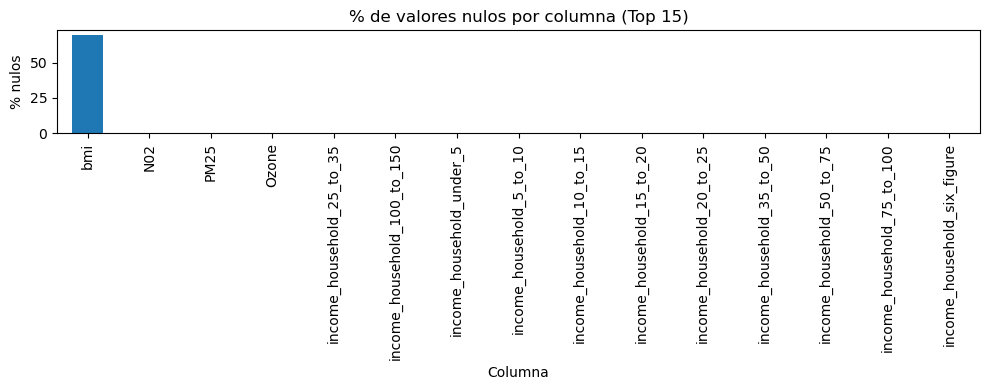


Columnas con >30% de valores nulos (training):


bmi    69.463815
dtype: float64


- Columnas con >60–70% de nulos se suelen eliminar si no aportan
- Entre 30–60% de nulos, conviene imputar (mediana, moda, modelos)
  y/o crear una variable indicadora de 'missing'.
- Por debajo de 10% de nulos, una imputación simple es razonable.



In [153]:
# Calculamos el % de valores nulos por columna en training
missing_pct = train_eda.isna().mean().sort_values(ascending=False) * 100 

print("% de valores nulos por columna (Top 20):")
display(missing_pct.head(20))

plt.figure(figsize=(10,4)) 
missing_pct.head(15).plot(kind="bar")
plt.title("% de valores nulos por columna (Top 15)")
plt.xlabel("Columna")
plt.ylabel("% nulos")
plt.tight_layout()
plt.show()

# Identificamos columnas con >30% de nulos
high_missing = missing_pct[missing_pct > 30] 
print("\nColumnas con >30% de valores nulos (training):")
display(high_missing)

print("""
- Columnas con >60–70% de nulos se suelen eliminar si no aportan
- Entre 30–60% de nulos, conviene imputar (mediana, moda, modelos)
  y/o crear una variable indicadora de 'missing'.
- Por debajo de 10% de nulos, una imputación simple es razonable.
""")


**6.1. Observar valores numéricos extremos o inconsistentes**

In [154]:
# Análisis de valores extremos en variables numéricas
num_cols_eda = train_eda.select_dtypes(include=[np.number]).columns.tolist()

# Análisis IQR y Z-score
if num_cols_eda:
    desc = train_eda[num_cols_eda].describe().T
    desc["IQR"] = desc["75%"] - desc["25%"]
    desc["low_thr"]  = desc["25%"] - 1.5 * desc["IQR"]
    desc["high_thr"] = desc["75%"] + 1.5 * desc["IQR"]

    print("Resumen estadístico (primeras 10 variables numéricas):")
    display(desc.head(10))

    out_rows = []
    for col in num_cols_eda:
        low, high = desc.loc[col, "low_thr"], desc.loc[col, "high_thr"]
        n_out = int(((train_eda[col] < low) | (train_eda[col] > high)).sum())
        if n_out > 0:
            out_rows.append({
                "variable": col,
                "n_outliers": n_out,
                "pct_outliers": round(n_out / len(train_eda) * 100, 2),
                "min": train_eda[col].min(),
                "max": train_eda[col].max()
            })
    out_df = pd.DataFrame(out_rows).sort_values("pct_outliers", ascending=False)
    print("\nVariables con outliers según IQR:")
    display(out_df.head(15))

    # Z-score > 4
    z_counts = {}
    for col in num_cols_eda:
        s = train_eda[col]
        mu, sd = s.mean(), s.std(ddof=0)
        if sd and not np.isnan(sd):
            z = (s - mu) / sd
            z_counts[col] = int((z.abs() > 4).sum())
    z_top = sorted(z_counts.items(), key=lambda x: x[1], reverse=True)[:10]
    print("\nTop variables con outliers por z-score (|z| > 4):")
    for c, n in z_top:
        print(f" - {c}: {n} posibles valores extremos")
else:
    print("No se encontraron columnas numéricas en train.")


Resumen estadístico (primeras 10 variables numéricas):


,count,mean,std,min,25%,50%,75%,max,IQR,low_thr,high_thr
patient_id,12906.0,547381.196033,260404.959974,100063.000000,321517.000000,543522.000000,772671.750000,999896.00000,451154.750000,-355215.125000,1.449404e+06
patient_zip3,12906.0,573.754300,275.447534,101.000000,331.000000,554.000000,846.000000,999.00000,515.000000,-441.500000,1.618500e+03
patient_age,12906.0,59.183326,13.335216,18.000000,50.000000,59.000000,67.000000,91.00000,17.000000,24.500000,9.250000e+01
bmi,3941.0,28.984539,5.696906,14.000000,24.660000,28.190000,32.920000,85.00000,8.260000,12.270000,4.531000e+01
population,12905.0,20744.441237,13886.903756,635.545455,9463.896552,19154.190480,30021.278690,71374.13158,20557.382138,-21372.176655,6.085735e+04
density,12905.0,1581.950419,2966.305306,0.916667,171.857143,700.337500,1666.515385,21172.00000,1494.658242,-2070.130220,3.908503e+03
age_median,12905.0,40.502259,4.036963,20.600000,37.129825,40.639344,42.934783,54.57000,5.804958,28.422387,5.164222e+01
age_under_10,12905.0,11.122784,1.512376,0.000000,10.160000,11.039216,12.190000,17.67500,2.030000,7.115000,1.523500e+01
age_10_to_19,12905.0,12.945265,1.923974,6.314286,11.741176,12.923944,14.019767,35.30000,2.278591,8.323290,1.743765e+01
age_20s,12905.0,13.290376,3.354103,5.925000,11.013415,12.538095,14.971053,62.10000,3.957638,5.076958,2.090751e+01



Variables con outliers según IQR:


,variable,n_outliers,pct_outliers,min,max
54,race_native,1246,9.65,0.000000,7.693478e+01
65,Ozone,1194,9.25,30.939316,5.223721e+01
51,farmer,1178,9.13,0.000000,2.672941e+01
53,race_asian,1159,8.98,0.000000,4.985000e+01
38,home_value,1148,8.90,60629.000000,1.853109e+06
61,limited_english,1130,8.76,0.000000,2.675500e+01
3,density,1092,8.46,0.916667,2.117200e+04
55,race_pacific,1027,7.96,0.000000,1.475844e+01
56,race_other,846,6.56,0.002564,3.318889e+01
66,PM25,831,6.44,2.636008,1.116941e+01



Top variables con outliers por z-score (|z| > 4):
 - density: 319 posibles valores extremos
 - race_asian: 175 posibles valores extremos
 - farmer: 126 posibles valores extremos
 - male: 124 posibles valores extremos
 - female: 124 posibles valores extremos
 - race_black: 121 posibles valores extremos
 - veteran: 115 posibles valores extremos
 - age_over_80: 97 posibles valores extremos
 - education_graduate: 85 posibles valores extremos
 - education_less_highschool: 78 posibles valores extremos


**7. Distribuciones y relaciones con la variable objetivo**
* Visualizar distribuciones de variables relevantes
* Identificar relaciones interesantes con la variable objetivo

Distribución de 'DiagPeriodL90D' (porcentaje):


DiagPeriodL90D
1    62.451573
0    37.548427
Name: proportion, dtype: float64

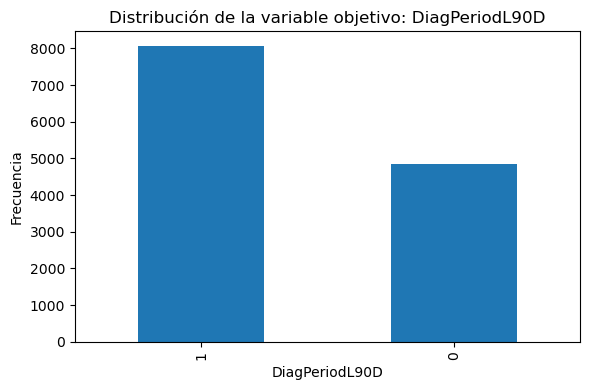


Variables numéricas seleccionadas (mayor desviación estándar): ['patient_id', 'home_value', 'income_household_median', 'population', 'income_individual_median']


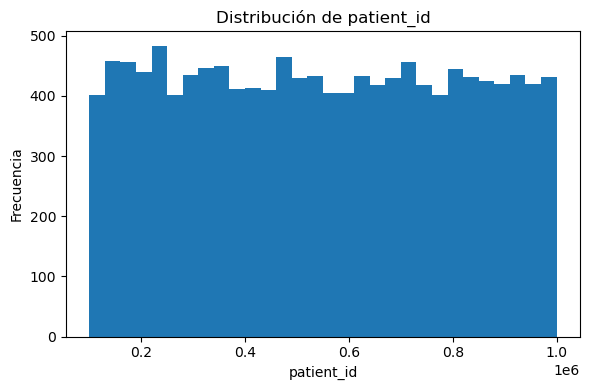

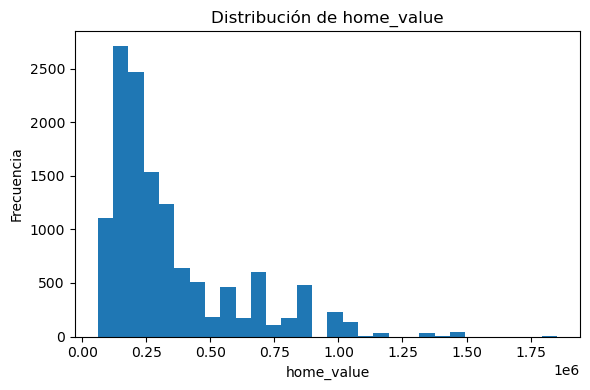

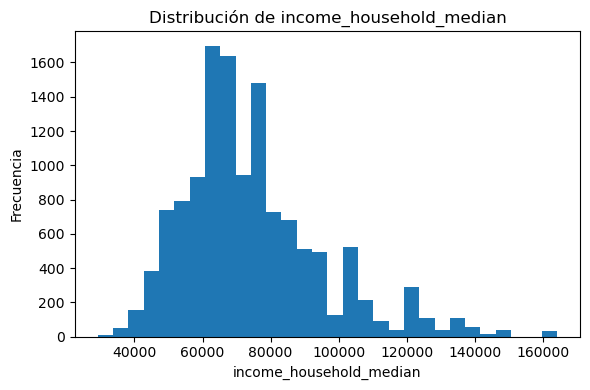

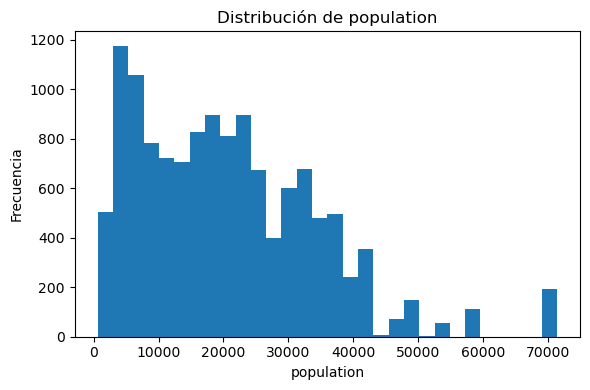

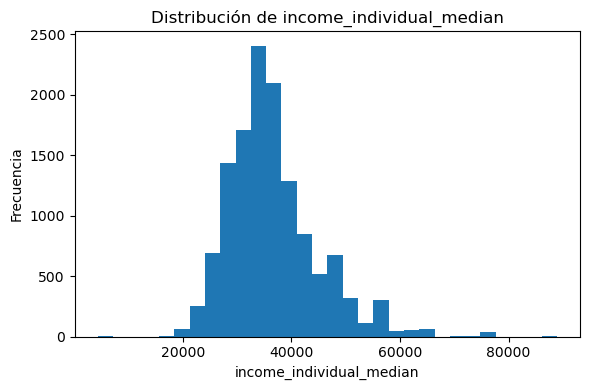


Categóricas de baja cardinalidad seleccionadas: ['patient_race', 'payer_type', 'patient_gender']


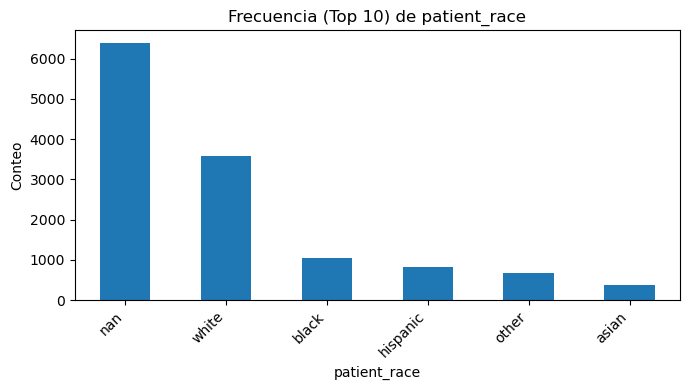

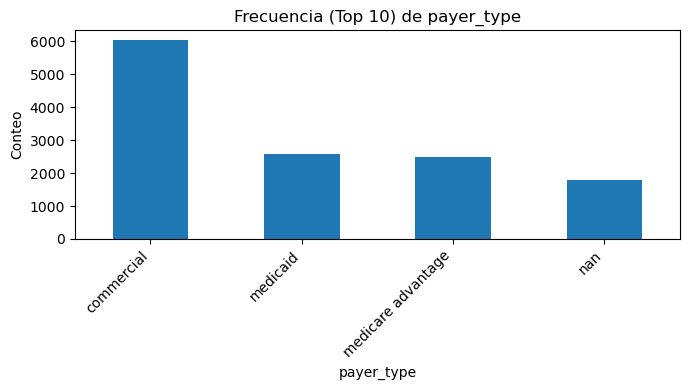

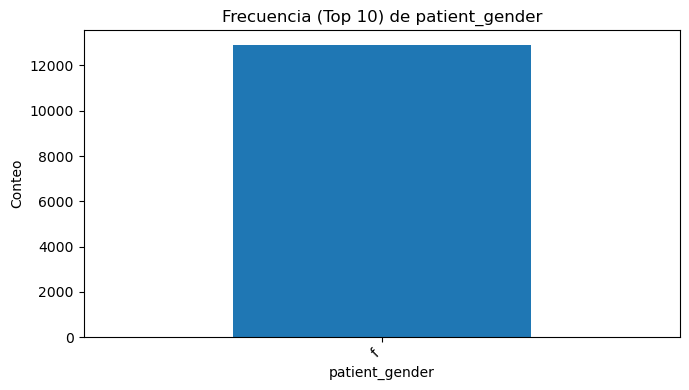

C:\Users\INIFAP-MOVIL\AppData\Local\Temp\ipykernel_10832\3297886488.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[str(c) for c in classes], showfliers=True)


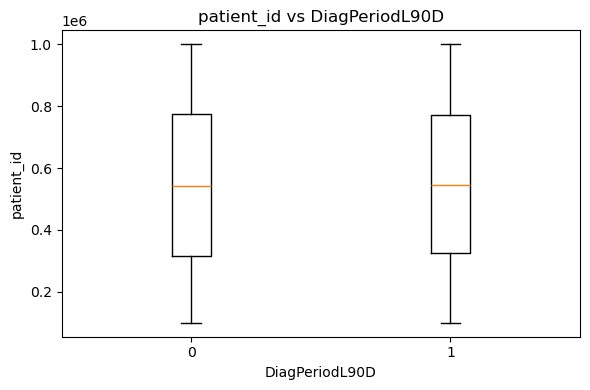

C:\Users\INIFAP-MOVIL\AppData\Local\Temp\ipykernel_10832\3297886488.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[str(c) for c in classes], showfliers=True)


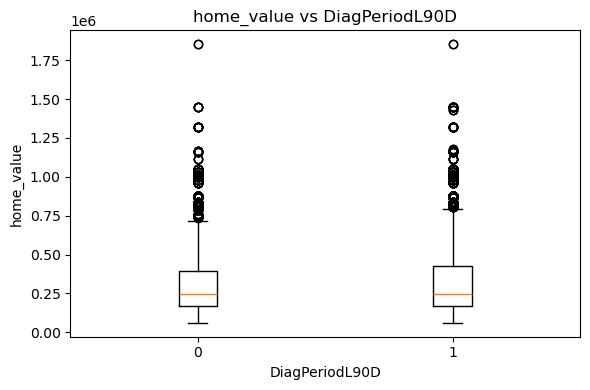

C:\Users\INIFAP-MOVIL\AppData\Local\Temp\ipykernel_10832\3297886488.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[str(c) for c in classes], showfliers=True)


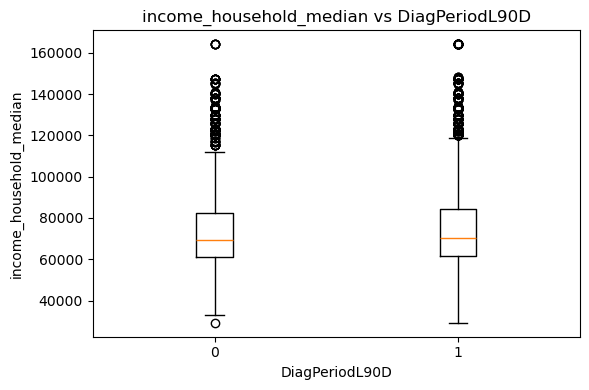

C:\Users\INIFAP-MOVIL\AppData\Local\Temp\ipykernel_10832\3297886488.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[str(c) for c in classes], showfliers=True)


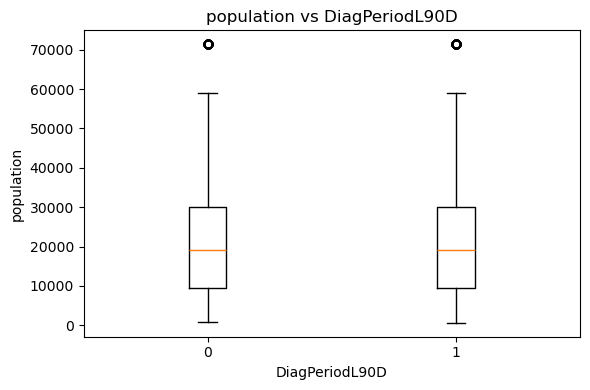

C:\Users\INIFAP-MOVIL\AppData\Local\Temp\ipykernel_10832\3297886488.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[str(c) for c in classes], showfliers=True)


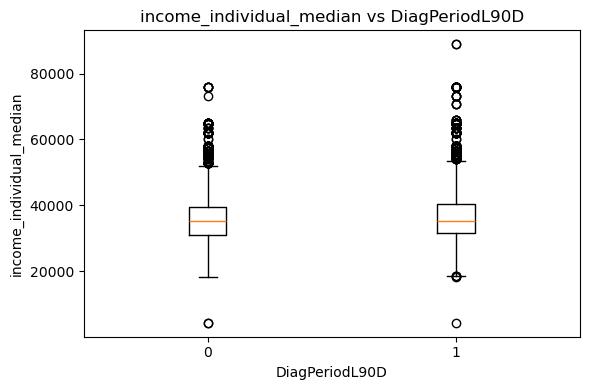

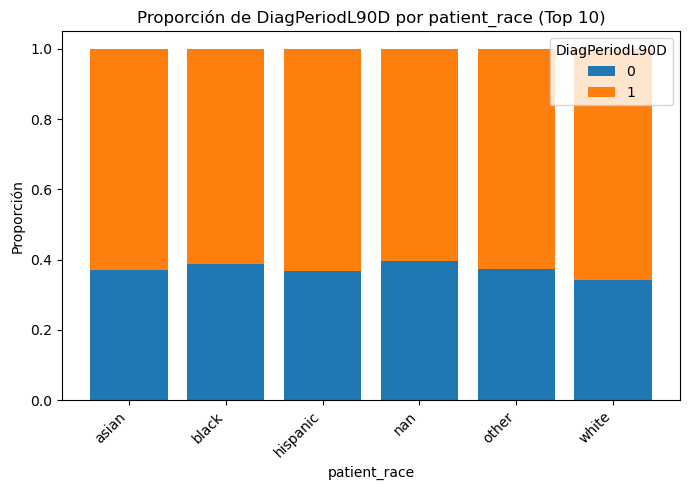

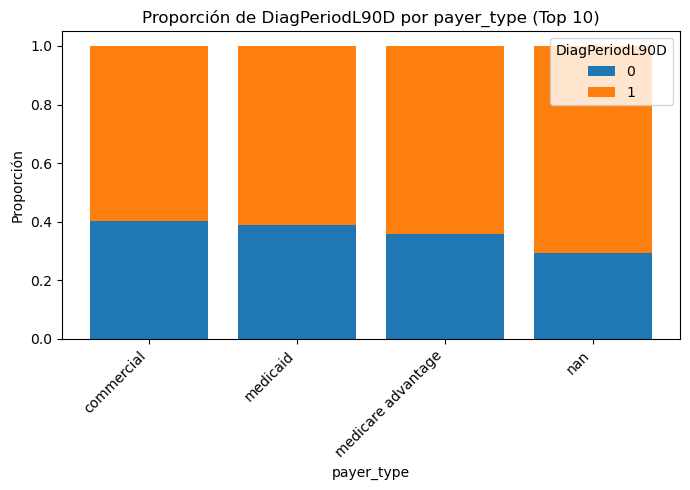

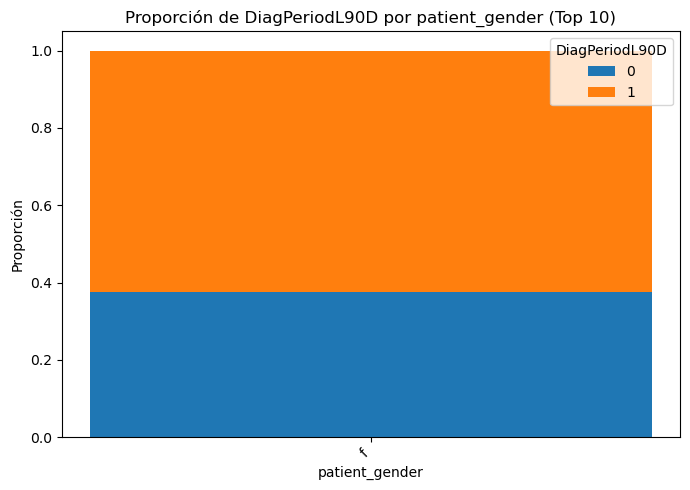


- Si la distribución de la variable objetivo está desbalanceada, habrá que considerar
  técnicas especiales en el modelado (ajuste de pesos, SMOTE, etc.).
- En los boxplots, si las medianas entre clases de {target_col} están separadas,
  la variable numérica puede tener poder predictivo.
- En las categóricas, si la proporción de la clase positiva/negativa cambia mucho
  entre categorías, también son buenas candidatas para el modelo.



In [155]:
# Distribución de la variable objetivo
print(f"Distribución de '{target_col}' (porcentaje):")
display(train_eda[target_col].value_counts(normalize=True) * 100)

plt.figure(figsize=(6,4))
train_eda[target_col].value_counts().plot(kind="bar")
plt.title(f"Distribución de la variable objetivo: {target_col}")
plt.xlabel(target_col)
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Variables numéricas principales (por variabilidad)
num_cols_eda = [c for c in train_eda.select_dtypes(include=[np.number]).columns if c != target_col]
top_num = (
    train_eda[num_cols_eda].std().sort_values(ascending=False).head(5).index.tolist()
    if num_cols_eda else []
)
print("\nVariables numéricas seleccionadas (mayor desviación estándar):", top_num)

for col in top_num:
    plt.figure(figsize=(6,4))
    train_eda[col].dropna().plot(kind="hist", bins=30)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

# Variables categóricas de baja cardinalidad
cat_cols_eda = train_eda.select_dtypes(include=["object", "category"]).columns.tolist()
low_card = [c for c in cat_cols_eda if train_eda[c].nunique() <= 10]
top_cat = low_card[:3]

print("\nCategóricas de baja cardinalidad seleccionadas:", top_cat)

for col in top_cat:
    plt.figure(figsize=(7,4))
    train_eda[col].value_counts(dropna=False).head(10).plot(kind="bar")
    plt.title(f"Frecuencia (Top 10) de {col}")
    plt.xlabel(col)
    plt.ylabel("Conteo")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Boxplots numéricas vs objetivo
classes = sorted(train_eda[target_col].dropna().unique())

for col in top_num:
    plt.figure(figsize=(6,4))
    data = [train_eda.loc[train_eda[target_col] == c, col].dropna() for c in classes]
    plt.boxplot(data, labels=[str(c) for c in classes], showfliers=True)
    plt.title(f"{col} vs {target_col}")
    plt.xlabel(target_col)
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Categóricas vs objetivo (barras apiladas de proporciones)
for col in top_cat:
    ct = pd.crosstab(train_eda[col], train_eda[target_col], normalize="index").head(10)
    plt.figure(figsize=(7,5))
    bottom = np.zeros(len(ct))
    for k in ct.columns:
        vals = ct[k].values
        plt.bar(ct.index.astype(str), vals, bottom=bottom, label=str(k))
        bottom += vals
    plt.title(f"Proporción de {target_col} por {col} (Top 10)")
    plt.xlabel(col)
    plt.ylabel("Proporción")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title=target_col)
    plt.tight_layout()
    plt.show()

print("""
- Si la distribución de la variable objetivo está desbalanceada, habrá que considerar
  técnicas especiales en el modelado (ajuste de pesos, SMOTE, etc.).
- En los boxplots, si las medianas entre clases de {target_col} están separadas,
  la variable numérica puede tener poder predictivo.
- En las categóricas, si la proporción de la clase positiva/negativa cambia mucho
  entre categorías, también son buenas candidatas para el modelo.
""")


### 8. Conclusiones del Análisis Exploratorio

El dataset de entrenamiento contiene múltiples variables numéricas y categóricas, pero algunas categorías difieren entre *train* y *test*, lo cual se observó especialmente en variables como estados de residencia o códigos médicos. Para evitar problemas al entrenar el modelo, es necesario normalizar texto, agrupar categorías raras y alinear los dominios entre ambos conjuntos.

Se identificaron columnas con más del **30 % de valores faltantes**; según su relevancia clínica, podría convenir eliminarlas o imputarlas. También existen variables numéricas con valores extremos, que pueden representar tanto errores como casos clínicamente importantes, por lo que es necesario analizarlos antes de modelar.

Las variables que mostraron diferencias claras entre clases de la variable objetivo **(`DiagPeriodL90D`)** —tanto en boxplots como en proporciones por categoría— son candidatas a tener mayor poder predictivo.

---

### Recomendaciones para el modelado

Para mejorar la calidad del entrenamiento y evitar errores de generalización, se recomienda aplicar:

- **Imputación de valores faltantes**
- **Codificación de variables categóricas (One-Hot Encoding)**
- **Normalización o estandarización de variables numéricas**
- **Técnicas para desbalance de clases de la variable objetivo**, como:
  - Pesos de clase
  - SMOTE u oversampling
  - Métricas orientadas a sensibilidad/recall y F1

---

Estas acciones permiten que el modelo trabaje con datos consistentes y aumentan la probabilidad de obtener un mejor desempeño en el diagnóstico temprano.
